## Data Prepocessing

### A. Feature Scaling
adalah metode yang digunakan untuk menormalkan berbagai variabel  independen atau fitur data.
1. Standarization / Mean Removal
2. Min - Max or Scaling Features to a range
3. Normalization
4. Binarization

*Standarisasi merupakan persyaratan umum bagi banyak model machine learning yang diterapkan dalam scikit-learn; mereka mungkin berperilaku buruk jika fitur individual tidak lebih atau kurang terlihat seperti data terdistribusi normal standar Gaussian dengan rata rata 0 dan standar deviasi 1.

### B. Label Encoding
adalah metode yang mengonversi label ke dalam bentuk angka sehingga dapat mengubahnya menjadi bentuk yang dapat dibaca model.
1. Label Encoder
2. One Hot Encoder

In [1]:
from sklearn import preprocessing
import numpy as np

x_train = np.array([[1., -5., 3.],
                    [1., -2., 0.],
                    [12., 1., -4.]])

x_train.mean(axis = 0)

array([ 4.66666667, -2.        , -0.33333333])

## Standarization / Main Removal / Variance Scaling

standarisasi data dengan membuat data memiliki rata rata 0 dan deviasi 1
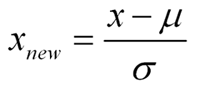

In [2]:
x_scaled = preprocessing.scale(x_train)
x_scaled

array([[-0.70710678, -1.22474487,  1.16247639],
       [-0.70710678,  0.        ,  0.11624764],
       [ 1.41421356,  1.22474487, -1.27872403]])

In [3]:
x_scaled.mean(axis=0)

array([0., 0., 0.])

In [4]:
x_scaled.std(axis=0) #standar deviasi

array([1., 1., 1.])

Hal yang harus diingat, adalah ketika kita melakukan standarisasi pada datatrain kita, kita juga harus melakukannya pada data test kita. Untuk dapat melakukannya, kita dapat menggunakan `StandardScaler`

In [5]:
scaler = preprocessing.StandardScaler().fit(x_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaler.mean_

array([ 4.66666667, -2.        , -0.33333333])

In [7]:
scaler.scale_

array([5.18544973, 2.44948974, 2.86744176])

In [8]:
scaler.transform(x_train)

array([[-0.70710678, -1.22474487,  1.16247639],
       [-0.70710678,  0.        ,  0.11624764],
       [ 1.41421356,  1.22474487, -1.27872403]])

In [9]:
#sekarang kita dapat mengubah data test kita

In [10]:
x_test = [[-1., 1., 0.]]

In [11]:
scaler.transform(x_test)

array([[-1.09280139,  1.22474487,  0.11624764]])

## Label Encoding

In [12]:
source = ['cangaroo', 'zebra', 'elephant', 'tiger']

#label encoder untuk mengubah data sebelumnya menjadi index dengan diurutkan berdasarkan ascending terlebih dahulu
le  = preprocessing.LabelEncoder()
src = le.fit_transform(source)

In [15]:
print("nama - nama hewan menggunakan label encoder:\n")
for k, y in enumerate(le.classes_):
    print(y, '\t', k)

nama - nama hewan menggunakan label encoder:

cangaroo 	 0
elephant 	 1
tiger 	 2
zebra 	 3


In [16]:
test_data = ['zebra', 'elephant', 'elephant', 'tiger']

result = le.transform(test_data)
print(result)

[3 1 1 2]


## One Hot / One-of-K Encoding
proses untuk merubah data categorical menjadi suatu data biner

In [17]:
from sklearn.preprocessing import OneHotEncoder

one_hot_enc = OneHotEncoder(sparse = False)
src         = src.reshape(len(src), 1)
one_hot     = one_hot_enc.fit_transform(src)

print(one_hot)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


C:\Users\Bagus\.conda\envs\tensorflow-sessions\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [20]:
invert_res = le.inverse_transform([np.argmax(one_hot[0, :])])

print(invert_res)

['cangaroo']


# Tantangan

Buatlah suatu model klasifikasi sederhana dengan menggunakan dataset Titanic.
1. Lakukan EDA dan juga visualisasi, temukan insight-insight menarik data tampilan dengan visualisasi yang tepat!
2. Lakukan data preprocessing untuk mengubah data numerik dengan menggunakan feature scaling dan data kategorical dengan menggunakan label encoding
3. Evaluate hasilnya
    - coba bandingkan hasil evaluasi sebelum dan sesudah menggunakan data preprocessing
    - coba bandingkan hasil evaluasi dengan tipe data preprocessing yang berbeda
4. Lihat submission hasil di kaggle data titanic

# Tambahan

Masih banyak materi lain yang harus dikejar setelah melalui materi - materi yang ada. Belajar mengenai : 
- Robust Regression, OLS Regression, Polynomial Regression, Multiple Regression
- Cross Validation Train - Test Data
- Variance Bias Trade Off
- Feature Importance
- Classification Models, such Decision Tree, KNN Classifier, etc.